#1. Normalize the dataset(if required)
#2. Extract impotant features from the dataset.
#3. Plot the outputs with respect to any inputs.
#4. From the given  dataset keep 70% of data for training purpose and 30% data for testing purpose.
#5. Devrlop the model using bagging, boosting and random foreston training dataset.
#6. Calculate the accuracy of models
#7. Compare th performances of models on training and testing dataset.


In [ ]:
import numpy as mp
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
from google.colab import files 
uploded = files.upload()

Saving iris.csv to iris.csv


In [ ]:
path = 'iris.csv'
df = pd.read_csv(path)
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [ ]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species           int64
dtype: object

In [ ]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [ ]:
X = df.drop("species",1) 
Y = df["species"]

<ipython-input-9-381694a8714b>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df.drop("species",1)


In [ ]:
X_new = df[['sepal_length','sepal_width','petal_length','sepal_width']]
X_new

,sepal_length,sepal_width,petal_length,sepal_width
0,5.1,3.5,1.4,3.5
1,4.9,3.0,1.4,3.0
2,4.7,3.2,1.3,3.2
3,4.6,3.1,1.5,3.1
4,5.0,3.6,1.4,3.6
...,...,...,...,...
145,6.7,3.0,5.2,3.0
146,6.3,2.5,5.0,2.5
147,6.5,3.0,5.2,3.0
148,6.2,3.4,5.4,3.4


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X_new, Y, test_size=0.3)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (105, 4) (105,)
Test set: (45, 4) (45,)


In [ ]:
from sklearn import datasets
from sklearn.ensemble import BaggingClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
bag = BaggingClassifier( 
    KNeighborsClassifier(n_neighbors=3), max_samples=.6, n_estimators = 60)

In [ ]:
bag.fit(X_train,y_train)

BaggingClassifier(estimator=KNeighborsClassifier(n_neighbors=3),
                  max_samples=0.6, n_estimators=60)

In [ ]:
from sklearn import metrics

In [ ]:
yhat= bag.predict(X_test)
yhat

array([2, 2, 2, 0, 0, 0, 0, 2, 2, 0, 1, 2, 1, 0, 1, 0, 1, 1, 2, 0, 2, 2,
       2, 2, 2, 1, 2, 0, 0, 2, 0, 0, 2, 2, 2, 1, 2, 2, 1, 0, 1, 1, 1, 2,
       1])

In [ ]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, bag.predict(X_train))) 
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.9714285714285714
Test set Accuracy:  0.9111111111111111


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
m = RandomForestClassifier(max_samples = 0.6, n_estimators=100)

In [ ]:
m.fit(X_train, y_train)

RandomForestClassifier(max_samples=0.6)

In [ ]:
from sklearn import metrics

In [ ]:
yhat= m.predict(X_test)
yhat

array([2, 2, 2, 0, 0, 0, 0, 2, 2, 0, 1, 2, 1, 0, 1, 0, 1, 1, 2, 0, 2, 2,
       2, 1, 2, 1, 2, 0, 0, 2, 0, 0, 2, 2, 2, 1, 2, 2, 1, 0, 1, 2, 1, 2,
       1])

In [ ]:
print("Train set Accuracy:", metrics.accuracy_score(y_train, m.predict(X_train)))
print("Test set Acucuracy:", metrics.accuracy_score(y_test, yhat))

Train set Accuracy: 0.9904761904761905
Test set Acucuracy: 0.9111111111111111


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
n = AdaBoostClassifier(n_estimators=50)

In [ ]:
n.fit(X_train, y_train)

AdaBoostClassifier()

In [ ]:
from sklearn import metrics

In [ ]:
yhat= n.predict(X_test)
yhat

array([2, 2, 2, 0, 0, 0, 0, 2, 2, 0, 1, 2, 1, 0, 1, 0, 1, 1, 2, 0, 2, 1,
       2, 1, 2, 1, 2, 0, 0, 2, 0, 0, 2, 2, 2, 1, 2, 2, 1, 0, 1, 2, 1, 2,
       1])

In [ ]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, n.predict(X_train))) 
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.9809523809523809
Test set Accuracy:  0.8888888888888888


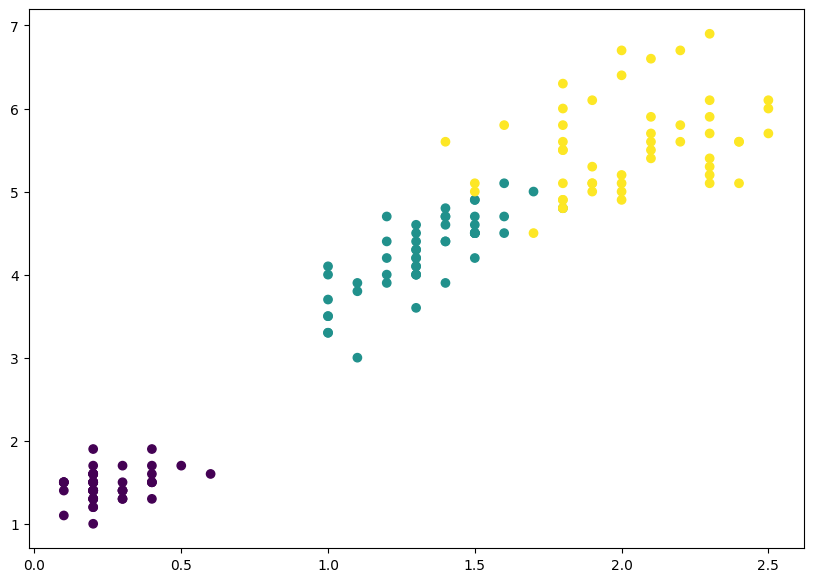

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(df['petal_width'],df['petal_length'], c=df.species)

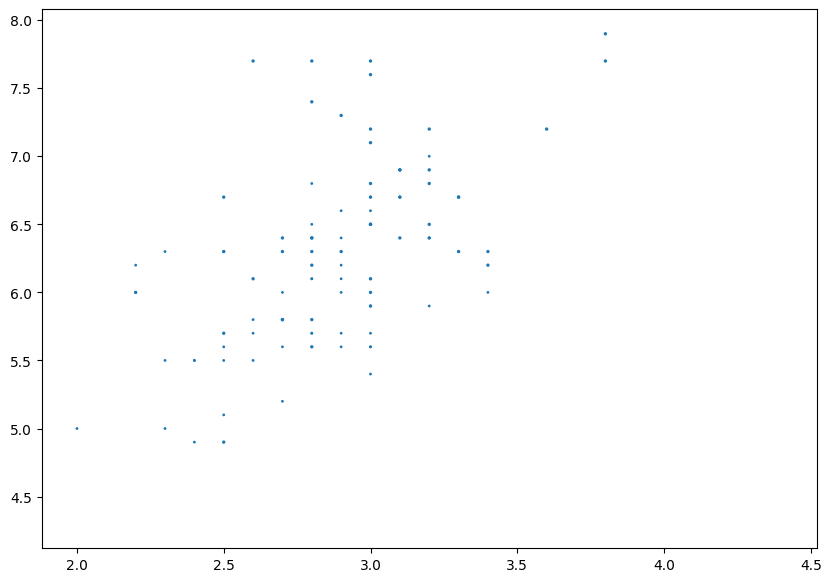

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(df['sepal_width'],df['sepal_length'], df.species)